# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
max_temp = []
wind_speed = []

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" 
#query_url

In [4]:
index = 0
for city in cities:
    print(f"Processing Record {index} {city}")

    # Get one of the posts
    response = requests.get(query_url + city).json()
    #print(response)

    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print("Skipping. Value not found.")
        pass
    index += 1
    #if index == 1:
        #break

Processing Record 0 mandalgovi
Processing Record 1 merritt island
Processing Record 2 atambua
Processing Record 3 borogontsy
Processing Record 4 bluff
Processing Record 5 warqla
Skipping. Value not found.
Processing Record 6 ushuaia
Processing Record 7 envira
Processing Record 8 oranjemund
Processing Record 9 bambous virieux
Processing Record 10 new ulm
Processing Record 11 jamestown
Processing Record 12 catalina foothills
Processing Record 13 hermanus
Processing Record 14 hilo
Processing Record 15 new norfolk
Processing Record 16 albany
Processing Record 17 luderitz
Processing Record 18 tuktoyaktuk
Processing Record 19 fairbanks
Processing Record 20 samalaeulu
Skipping. Value not found.
Processing Record 21 sines
Processing Record 22 koshurnikovo
Processing Record 23 broome
Processing Record 24 hithadhoo
Processing Record 25 rikitea
Processing Record 26 saleaula
Skipping. Value not found.
Processing Record 27 sechura
Processing Record 28 bredasdorp
Processing Record 29 kieta
Processin

Skipping. Value not found.
Processing Record 247 dingle
Processing Record 248 sambava
Processing Record 249 mount gambier
Processing Record 250 margate
Processing Record 251 kavieng
Processing Record 252 bac lieu
Processing Record 253 kalabo
Processing Record 254 lompoc
Processing Record 255 karla
Processing Record 256 airai
Processing Record 257 juneau
Processing Record 258 kresek
Processing Record 259 saint anthony
Processing Record 260 mayo
Processing Record 261 walvis bay
Processing Record 262 pacific grove
Processing Record 263 kruisfontein
Processing Record 264 maceio
Processing Record 265 attawapiskat
Skipping. Value not found.
Processing Record 266 khatanga
Processing Record 267 binzhou
Processing Record 268 satipo
Processing Record 269 ribeira grande
Processing Record 270 carmen
Processing Record 271 sao filipe
Processing Record 272 kaeo
Processing Record 273 leningradskiy
Processing Record 274 meulaboh
Processing Record 275 umm lajj
Processing Record 276 okhotsk
Processing Re

Processing Record 493 abu samrah
Processing Record 494 boali
Processing Record 495 shiyan
Processing Record 496 leavenworth
Processing Record 497 wonthaggi
Processing Record 498 mayahi
Processing Record 499 mount isa
Processing Record 500 houma
Processing Record 501 xapuri
Processing Record 502 tubruq
Skipping. Value not found.
Processing Record 503 tuggurt
Skipping. Value not found.
Processing Record 504 vestmanna
Processing Record 505 mareeba
Processing Record 506 impfondo
Processing Record 507 santa maria
Processing Record 508 matai
Processing Record 509 fort nelson
Processing Record 510 havelock
Processing Record 511 dengzhou
Processing Record 512 dawei
Processing Record 513 saint pete beach
Processing Record 514 sasovo
Processing Record 515 quatre cocos
Processing Record 516 abrego
Processing Record 517 hue
Processing Record 518 narsaq
Processing Record 519 tura
Processing Record 520 viesca
Processing Record 521 morondava
Processing Record 522 latehar
Processing Record 523 poum
Pr

In [5]:
print(len(city_name), len(cloudiness), len(country), len(date), len(humidity), len(lat), len(lng), len(temp), len(max_temp), len(wind_speed))

575 575 575 575 575 575 575 575 575 575


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Max Temp,Wind Speed
0,Mandalgovi,0,MN,1580607044,66,45.76,106.27,0.55,0.55,14.92
1,Merritt Island,90,US,1580607044,87,28.54,-80.67,59.25,61.00,10.29
2,Atambua,100,ID,1580606542,74,-9.11,124.89,79.95,79.95,0.81
3,Borogontsy,92,RU,1580607045,96,62.67,131.17,-21.48,-21.48,5.28
4,Bluff,100,NZ,1580607045,93,-46.60,168.33,57.00,57.00,8.01
...,...,...,...,...,...,...,...,...,...,...
570,Bertoua,66,CM,1580607193,35,4.58,13.68,60.49,60.49,2.89
571,Whitehorse,90,CA,1580607132,77,60.72,-135.05,4.55,5.00,10.29
572,Inuvik,20,CA,1580607194,67,68.35,-133.72,-25.92,-22.00,10.33
573,Yangi Marg`ilon,100,UZ,1580607194,68,40.43,71.72,30.97,32.00,6.93


In [8]:
weather_data.to_csv("weatherpy.csv",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

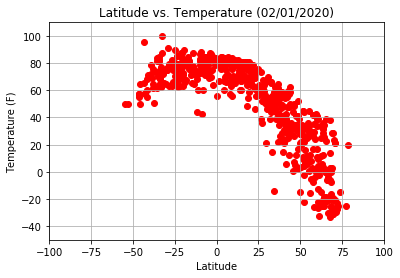

In [175]:
plt.scatter(weather_data["Lat"],
            weather_data["Temperature"],
            color="red")
plt.title("Latitude vs. Temperature" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-50, 110])

plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

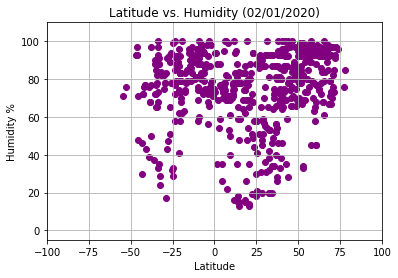

In [176]:
plt.scatter(weather_data["Lat"],
            weather_data["Humidity"],
            color="purple")
plt.title("Latitude vs. Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-5, 110])

plt.savefig("lat_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

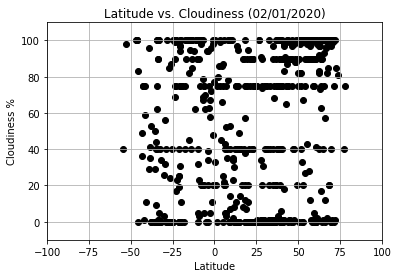

In [174]:
plt.scatter(weather_data["Lat"],
            weather_data["Cloudiness"],
            color="black")
plt.title("Latitude vs. Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 110])

plt.savefig("lat_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

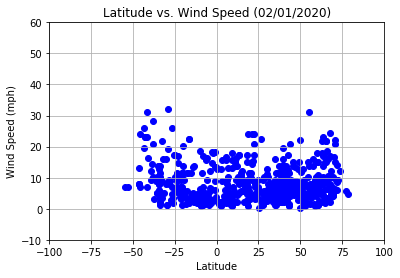

In [177]:
plt.scatter(weather_data["Lat"],
            weather_data["Wind Speed"],
            color="blue")
plt.title("Latitude vs. Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-100, 100])
plt.ylim([-10, 60])

plt.savefig("lat_wind_speed.png")
plt.show()

## Linear Regression

In [154]:
# OPTIONAL: Create a function to create Linear Regression plots


In [155]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_data.loc[(weather_data["Lat"] >= 0)]
south = weather_data.loc[(weather_data["Lat"] < 0)]
south

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Max Temp,Wind Speed
2,Atambua,100,ID,1580606542,74,-9.11,124.89,79.95,79.95,0.81
4,Bluff,100,NZ,1580607045,93,-46.60,168.33,57.00,57.00,8.01
5,Ushuaia,40,AR,1580606987,71,-54.80,-68.30,50.00,50.00,6.93
6,Envira,20,BR,1580607046,98,-7.30,-70.22,73.47,73.47,2.73
7,Oranjemund,100,NA,1580607046,91,-28.55,16.43,63.19,63.19,9.22
...,...,...,...,...,...,...,...,...,...,...
557,Caxito,75,AO,1580607189,88,-8.58,13.66,80.60,80.60,4.70
558,San Jeronimo,94,PE,1580607189,89,-11.95,-75.28,44.37,44.37,4.76
561,Santa Cruz de la Sierra,40,BO,1580606993,83,-17.80,-63.17,78.42,78.80,5.82
567,Lufilufi,100,WS,1580607192,94,-13.87,-171.60,78.01,78.01,5.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

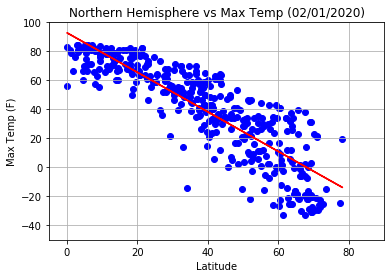

In [178]:
latitude = north["Lat"]
max_temp = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
plt.scatter(latitude, max_temp, color="blue")
plt.plot(latitude, regress_values,"r-")
plt.title("Northern Hemisphere vs Max Temp" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.ylim([-50, 100])
plt.xlim([-5, 90])

#plt.savefig("north_max_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

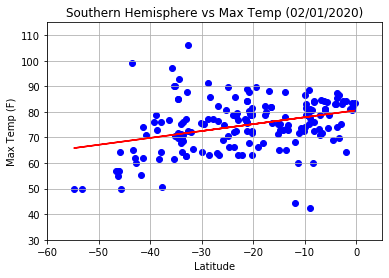

In [179]:
latitude = south["Lat"]
max_temp = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, max_temp)
regress_values = latitude * slope + intercept
plt.scatter(latitude, max_temp, color="blue")
plt.plot(latitude, regress_values,"r-")
plt.title("Southern Hemisphere vs Max Temp" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)
plt.ylim([30, 115])
plt.xlim([-60, 5])

#plt.savefig("south_max_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

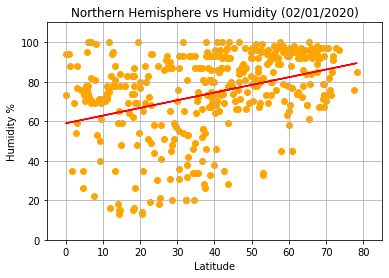

In [180]:
latitude = north["Lat"]
humidity = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
plt.scatter(latitude, humidity, color="orange")
plt.plot(latitude, regress_values,"r-")
plt.title("Northern Hemisphere vs Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.ylim([0, 110])
plt.xlim([-5, 85])

#plt.savefig("north_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

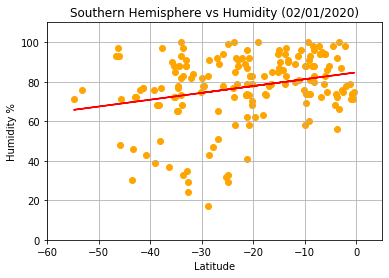

In [181]:
latitude = south["Lat"]
humidity = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
plt.scatter(latitude, humidity, color="orange")
plt.plot(latitude, regress_values,"r-")
plt.title("Southern Hemisphere vs Humidity" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.ylim([0, 110])
plt.xlim([-60, 5])

#plt.savefig("south_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

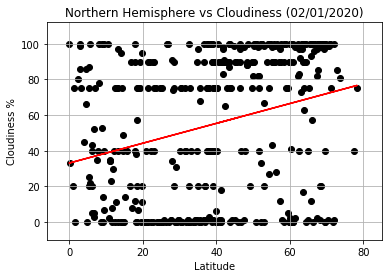

In [182]:
latitude = north["Lat"]
cloudiness = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
plt.scatter(latitude, cloudiness, color="black")
plt.plot(latitude, regress_values,"r-")
plt.title("Northern Hemisphere vs Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.ylim([-10, 112])
plt.xlim([-6, 85])

#plt.savefig("north_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

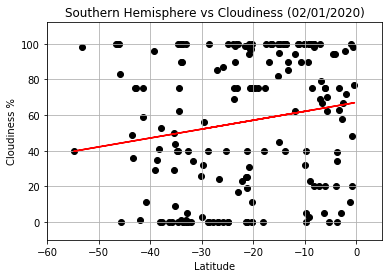

In [183]:
latitude = south["Lat"]
cloudiness = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
plt.scatter(latitude, cloudiness, color="black")
plt.plot(latitude, regress_values,"r-")
plt.title("Southern Hemisphere vs Cloudiness" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.ylim([-10, 112])
plt.xlim([-60, 5])

#plt.savefig("south_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

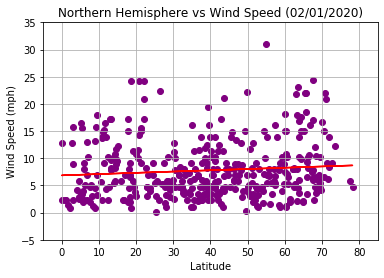

In [184]:
latitude = north["Lat"]
wind_speed = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
plt.scatter(latitude, wind_speed, color="purple")
plt.plot(latitude, regress_values,"r-")
plt.title("Northern Hemisphere vs Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.ylim([-5, 35])
plt.xlim([-5, 85])

#plt.savefig("north_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

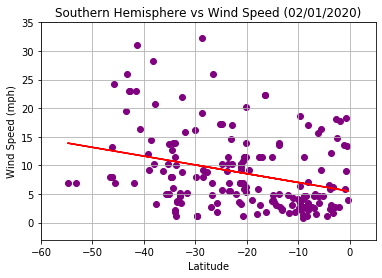

In [185]:
latitude = south["Lat"]
wind_speed = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
plt.scatter(latitude, wind_speed, color="purple")
plt.plot(latitude, regress_values,"r-")
plt.title("Southern Hemisphere vs Wind Speed" + " " + "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.ylim([-3, 35])
plt.xlim([-60, 5])

#plt.savefig("south_wind_speed.png")
plt.show()